In [2]:
import numpy as np
import scipy.special
import csv
import pandas as pd

In [3]:
from neuralNetwork import neuralNetwork


In [5]:
input_nodes = 5
hidden_nodes = 512
output_nodes = 5
learning_rate = 0.3

In [6]:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [7]:
import makedata

In [8]:
Data = makedata.MakeData()

In [9]:
inputs = Data.input_learn
outputs = Data.output_learn
input_test = Data.input_test
output_test = Data.output_test
mses = []
num_list = []

In [10]:
output_test

array([[-0.61639577],
       [ 2.5144148 ],
       [-1.03997603],
       [ 0.45176313],
       [-0.98472643],
       [-0.32173125],
       [-0.72689497],
       [-0.45064698],
       [ 0.08343247],
       [-0.17439898],
       [-0.34014778],
       [-0.28489818],
       [ 0.54384579],
       [ 3.19582652],
       [ 0.4885962 ],
       [ 0.23076474],
       [-0.61639577],
       [-0.50589658],
       [ 0.13868207],
       [-0.22964858],
       [ 0.4885962 ],
       [ 0.4885962 ],
       [-0.11914939],
       [-1.05839256],
       [-0.83739417],
       [ 0.96742605],
       [-0.45064698],
       [-1.02155949],
       [ 1.11475831],
       [ 1.13317484],
       [-0.34014778],
       [-0.6900619 ],
       [-0.61639577],
       [-0.54272964],
       [-0.8005611 ],
       [-1.15047522],
       [-0.92947683],
       [-0.87422723],
       [ 0.50701273],
       [-0.8005611 ],
       [-1.02155949],
       [-0.72689497],
       [ 2.86432893],
       [-0.28489818],
       [-0.28489818],
       [ 2

In [8]:
import scipy
import scipy.special

In [17]:
mses = []
for i in range(len(inputs)):
    targets = np.zeros(output_nodes)
    targets[int(outputs[i][0])-1] = 0.99
    n.train(inputs[i], targets)
    num_list.append(i)
    mse = 0
    for k in range(len(input_test)):
        query = n.query(input_test[k])
        # print(query)
        test_targets = np.zeros(output_nodes)
        test_targets[int(output_test[k][0])-1] = 0.99
        for j in range(len(query)):
            mse += (query[j][0] - test_targets[j])**2
            # print(mse)

    mse = mse/5/len(input_test)

    mses.append(mse)

correct = 0
near = 0
for i in range(len(input_test)):
    q = n.query(input_test[i])
    if q.argmax(axis=0)[0]+1 == output_test[i][0]:
        correct +=1
        near +=1
    elif q.argmax(axis=0)[0]+2 == output_test[i][0] or q.argmax(axis=0)[0] == output_test[i][0]:
        near +=1

print(f"正解　{correct/len(output_test)}")
print(f"惜しい{near/len(output_test)}")


正解　0.3333333333333333
惜しい0.6190476190476191


In [31]:
q = n.query(input_test[1])
q.reshape(1,5)
label = ["男性の平均寿命", "女性の平均寿命", "幸福度", "出生率", "1人当たりのGDP", "自殺率が1っぽさ", "自殺率が2っぽさ", "自殺率が3っぽさ", "自殺率が4っぽさ", "自殺率が5っぽさ"]
x = np.append(input_test[0], q.reshape(1,5))
df = pd.DataFrame(x, index=label)

In [33]:
df.to_csv("./output.csv",encoding="shift-jis")

In [10]:
import matplotlib.pyplot as plt

In [1]:
plt.plot(mses, ".")

NameError: name 'plt' is not defined

In [12]:
correct = 0
for i in range(len(input_test)):
    q = n.query(input_test[i])
    if q.argmax(axis=0)[0]+1 == output_test[i][0]:
        correct +=1

correct/len(output_test)

0.30952380952380953

In [13]:
q.argmax(axis=0)[0]+1

1

In [14]:
x = np.arange(-4,4,0.025)
y = np.array([ i*(i>0.0) for i in x])

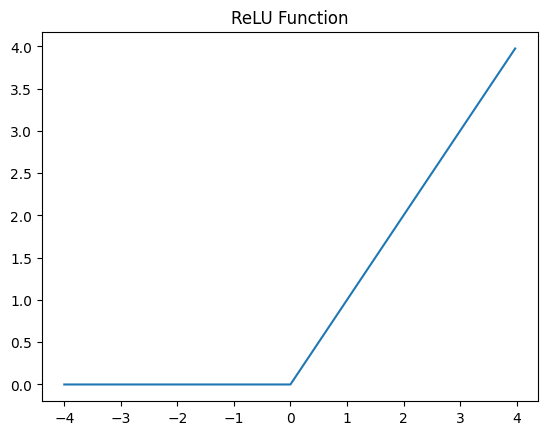

In [15]:
plt.plot(x,y)
plt.title("ReLU Function")
plt.show()